In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Salary_Data.csv")
X = df['YearsExperience']
y = df['Salary']

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#Mencari dan menangani missing values.
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

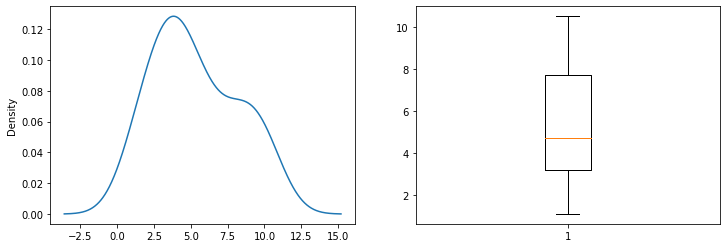

In [ ]:
#Univariate analysis YearsExperience.
#Melihat distribusi dari YearsExperience.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
X.plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(X)
plt.show()

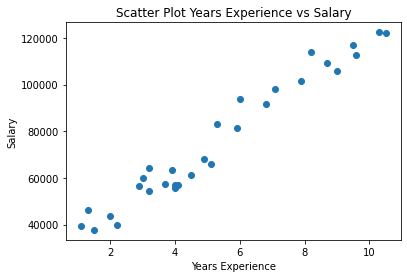

In [ ]:
plt.scatter(X, y)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot Years Experience vs Salary')
plt.show()

In [ ]:
#Mengetahui nilai korelasi
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [5]:
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [6]:
X_train.shape

(21, 1)

In [7]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
print(model.coef_)
print(model.intercept_)

[[9339.08172382]]
[25918.43833489]


In [9]:
model.score(X_test, y_test)

0.9414466227178214

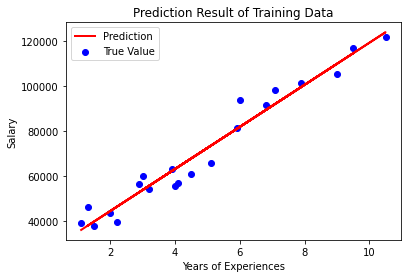

In [10]:
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

In [ ]:
model.predict([[3]])

array([[53935.68350634]])

In [ ]:
model.predict([[8]])

array([[100631.09212541]])

In [ ]:
model.predict([[15]])

array([[166004.66419212]])

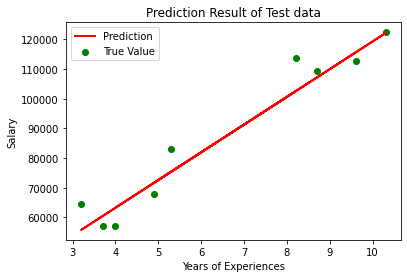

In [11]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [14]:
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Root meen square error =", round(sm.mean_squared_error(y_test, y_test_pred,squared=False), 2))
print("MAPE =", round(sm.mean_absolute_percentage_error(y_test, y_test_pred), 2))


Mean squared error = 37784662.47
Root meen square error = 6146.92
MAPE = 0.07
